In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc

rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)
sns.set_theme()
sns.set(font_scale=2.5, style="whitegrid")
# sns.set_style("darkgrid", {"grid.color": ".1", "grid.linestyle": ":"})


def get_avg_results(settings_files, alg):    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/{alg}/{set}"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        test_acc_list.append(test_accs[-1])


    return np.mean(test_acc_list), np.std(test_acc_list)

def get_feded_results(settings_files, n_pub, model, loss, weight_scheme, summary=True):

    test_acc_lists = []
    ensemble_test_acc = []
    dataset = settings_files[0].split('_')[0]

    for i, set in enumerate(settings_files):
        results_path = f"../results/{dataset}/feded/{set}"

        with open(f"{results_path}/w{weight_scheme}_student_mnist_{model}_{loss}_test_results_{n_pub}.npy", "rb") as f:
            test_acc_lists.append(np.load(f)[0])

            
        with open(f"{results_path}/w{weight_scheme}_ensemble_test_acc.npy", "rb") as f:
            ensemble_test_acc.append(np.load(f)[0])

    if summary:
        return (np.mean(test_acc_lists), np.std(test_acc_lists)), (np.mean(ensemble_test_acc), np.std(ensemble_test_acc))
    else:
        return test_acc_lists, ensemble_test_acc
                                                                

# Tables

In [2]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = 30000
model = "mnist_cnn1"
student = "cnn2"

dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]

table = "\\begin{table}[]\centering\\begin{tabular}{c|cccc}\n"
table += "Algorithm & $\\alpha=10$ & $\\alpha=1$ & $\\alpha=0.1$ & $\\alpha=0.01$ \\\\ \\hline \n"

table += "\\textsc{FedAvg} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedavg")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedProx} "

for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    m, s = get_avg_results(settings_files, "fedprox")
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w0} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2}"
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{FedED-w2} ($CE$) "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    (m, s), _ = get_feded_results(settings_files, n_pub, student, "ce", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \hdashline \n \\textsc{Ensemble-w0} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student, "mse", 0)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w1} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student, "mse", 1)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\textsc{Ensemble-w2} "
for d in dists:
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    _, (m, s) = get_feded_results(settings_files, n_pub, student, "mse", 2)
    table += "& {:.2f}$\\pm${:.2f} ".format(m, s)

table += "\\\\ \n \\end{tabular} \n \\caption{Caption} \n \\label{tab:my_label} \n \\end{table}"

print(table)

\begin{table}[]\centering\begin{tabular}{c|cccc}
Algorithm & $\alpha=10$ & $\alpha=1$ & $\alpha=0.1$ & $\alpha=0.01$ \\ \hline 
\textsc{FedAvg} & 94.14$\pm$0.75 & 93.96$\pm$0.92 & 91.83$\pm$1.16 & 88.37$\pm$1.39 \\ 
 \textsc{FedProx} & 94.11$\pm$0.74 & 93.99$\pm$0.91 & 91.93$\pm$1.14 & 88.30$\pm$1.47 \\ 
 \textsc{FedED-w0} & 94.89$\pm$0.68 & 94.37$\pm$0.64 & 77.15$\pm$7.36 & 42.47$\pm$7.04 \\ 
 \textsc{FedED-w1} & 94.83$\pm$0.72 & 94.82$\pm$0.53 & 81.49$\pm$9.60 & 36.68$\pm$3.01 \\ 
 \textsc{FedED-w2}& 93.04$\pm$0.49 & 92.96$\pm$0.44 & 91.05$\pm$1.80 & 90.39$\pm$1.86 \\ 
 \textsc{FedED-w2} ($CE$) & 92.18$\pm$1.24 & 92.69$\pm$0.88 & 93.31$\pm$1.17 & 93.91$\pm$0.90 \\ \hdashline 
 \textsc{Ensemble-w0} & 90.69$\pm$1.54 & 91.06$\pm$1.18 & 75.61$\pm$7.09 & 39.49$\pm$5.86 \\ 
 \textsc{Ensemble-w1} & 90.77$\pm$1.53 & 91.66$\pm$1.05 & 88.44$\pm$2.86 & 38.11$\pm$13.51 \\ 
 \textsc{Ensemble-w2} & 90.87$\pm$1.43 & 92.02$\pm$0.96 & 93.08$\pm$1.16 & 92.73$\pm$1.48 \\ 
 \end{tabular} 
 \caption{Capt

# Figures

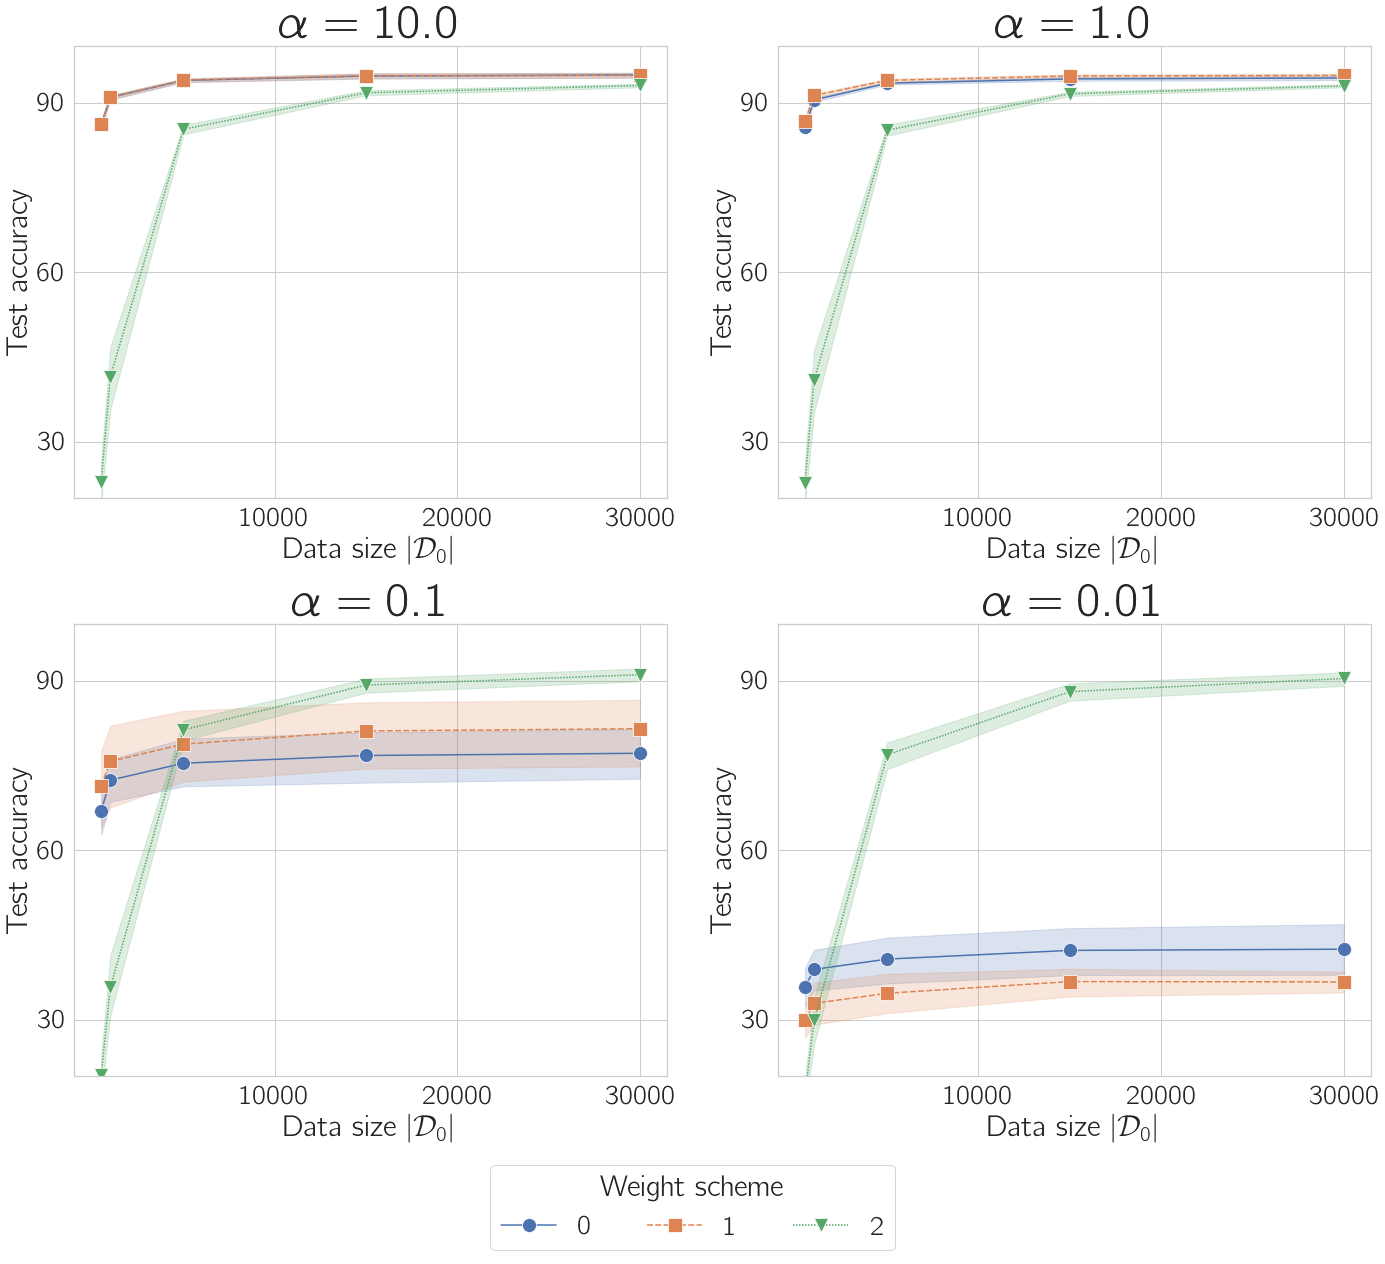

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = [500, 1000, 5000, 15000, 30000]
model = "mnist_cnn1"
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
schemes = [0, 1, 2]
student_model = "cnn2"

data = []
for d in dists:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, student_model, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], d, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Dist', 'Scheme'])

fig, ax = plt.subplots(2, 2, figsize=(20, 18))
ax = ax.flatten()
markers = ['o', 's', 'v']
for i in range(4):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.Dist == dists[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Scheme',
    style='Scheme', 
    palette=["C0", "C1", "C2"],
    legend=False)

    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'Data size $|\mathcal{D}_0|$')
    ax[i].set_title(r'$\alpha={}$'.format(dists[i][4:]), fontsize=48)
    ax[i].set_xticks([10000, 20000, 30000])
    ax[i].set_ylim([20, 100])
    ax[i].set_yticks([30, 60, 90])

fig.legend(title='Weight scheme', handles=p.lines, labels=['0', '1', '2'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('../../thesis_images/mnist_npub.png', dpi=300)
plt.show()

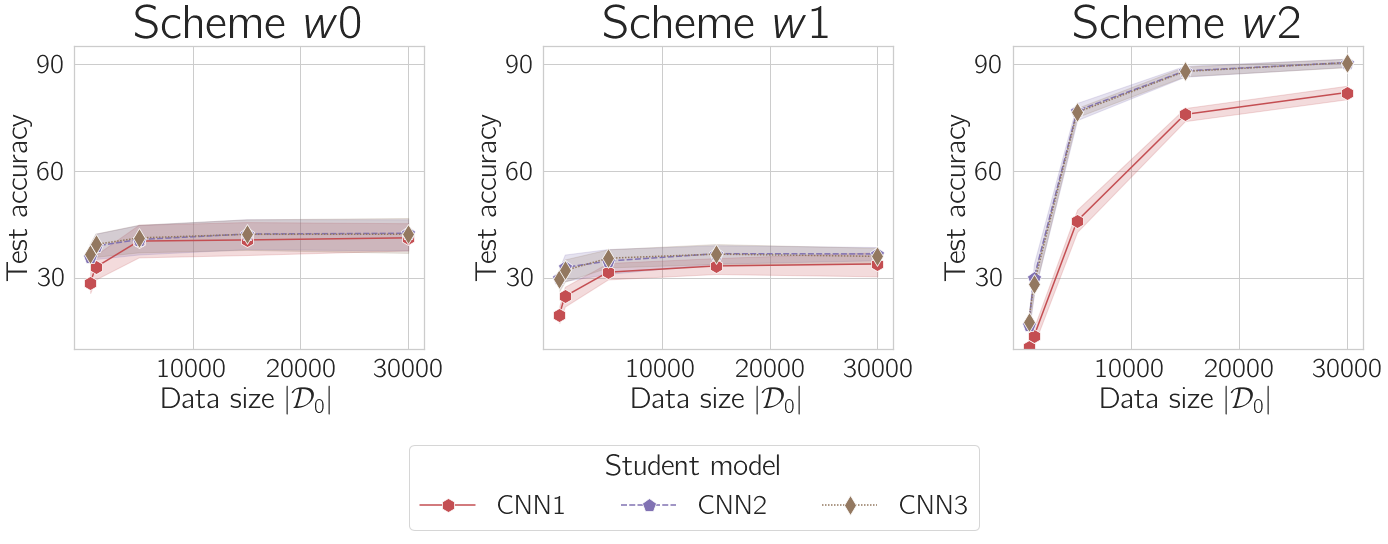

In [4]:
seeds = [1,2,3,4,5,6,7,8,9,10]
n_clients = 10
n_pub = [500, 1000, 5000, 15000, 30000]
model = "mnist_cnn1"
students = ["cnn1", "cnn2", "cnn3"]
dist = "niid0.01"
schemes = [0, 1, 2]

data = []
for stu in students:
    for n in n_pub:
        for w in schemes:
            settings_files = [f"{model}_c{n_clients}_{dist}_s{i}" for i in seeds]
            feded_accs, _ = get_feded_results(settings_files, n, stu, "mse", w, summary=False)
            for i in seeds:
                data.append([n, feded_accs[i-1], stu, w])

df = pd.DataFrame(data, columns=['public samples', 'Test accuracy', 'Student model', 'scheme'])

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
markers = ['h', 'p', 'd']
for i in range(3):
    p = sns.lineplot(ax=ax[i], 
    data=df[df.scheme == schemes[i]], 
    x='public samples', 
    y='Test accuracy', 
    hue='Student model',
    style='Student model', 
    palette=["C3", "C4", "C5"],
    legend=False)
    
    for j in range(3):
        p.lines[j].set_marker(markers[j])
        p.lines[j].set_markersize(14)

    ax[i].set_xlabel(r'Data size $|\mathcal{D}_0|$')
    ax[i].set_title(r'Scheme $w{}$'.format(i), fontsize=48)
    ax[i].set_xticks([10000, 20000, 30000])
    ax[i].set_ylim([10, 95])
    ax[i].set_yticks([30, 60, 90])

fig.legend(title='Student model', handles=p.lines, labels=['CNN1', 'CNN2', 'CNN3'], ncol=3, loc='lower center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig('../../thesis_images/mnist_students_comparison.png', dpi=300)
plt.show()